# Dimensionality Reduction in Python

## 1. Exploring High Dimensional Data

In [14]:
import pandas as pd

pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [22]:
pokemon_df = pokemon[['HP', 'Attack', 'Defense', 'Generation', 'Name', 'Type 1', 'Legendary']][:160]
pokemon_df.rename(columns={"Type 1": 'Type'}, inplace=True)

len(pokemon_df.columns)

7

Answer: 7 dimensions

In [23]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense', 'Generation']

pokemon_df[number_cols].describe()

,HP,Attack,Defense,Generation
count,160.000000,160.000000,160.000000,160.0
mean,64.725000,74.712500,70.268750,1.0
std,27.917883,28.827701,28.880086,0.0
min,10.000000,5.000000,5.000000,1.0
25%,45.000000,52.000000,50.000000,1.0
50%,60.000000,71.000000,65.000000,1.0
75%,80.000000,95.000000,85.000000,1.0
max,250.000000,155.000000,180.000000,1.0


In [24]:
number_cols.remove('Generation')
print(number_cols)

['HP', 'Attack', 'Defense']


In [25]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
df_selected.head()

,HP,Attack,Defense,Name,Type,Legendary
0,45,49,49,Bulbasaur,Grass,False
1,60,62,63,Ivysaur,Grass,False
2,80,82,83,Venusaur,Grass,False
3,80,100,123,VenusaurMega Venusaur,Grass,False
4,39,52,43,Charmander,Fire,False


In [26]:
df_selected.describe(exclude='number')

,Name,Type,Legendary
count,160,160,160
unique,160,15,2
top,Bulbasaur,Water,False
freq,1,31,157


In [27]:
non_number_cols.remove('Legendary')
print(non_number_cols)

['Name', 'Type']


In [90]:
ansur_male = pd.read_csv('ANSUR_II_MALE.csv')
ansur_female = pd.read_csv('ANSUR_II_FEMALE.csv')

In [45]:
df1 = ansur_male[['Gender', 'weight_kg', 'stature_m']][:100]
df1['body_height'] = df1['stature_m'] / 0.025
df1['n_legs'] = [2] * 100

df2 = ansur_female[['Gender', 'weight_kg', 'stature_m']][:100]
df2['body_height'] = df2['stature_m'] / 0.025
df2['n_legs'] = [2] * 100

ansur_df_1 = pd.concat([df1, df2], axis=0, ignore_index=True)
ansur_df_1.head()

,Gender,weight_kg,stature_m,body_height,n_legs
0,Male,81.5,1.776,71.04,2
1,Male,72.6,1.702,68.08,2
2,Male,92.9,1.735,69.40,2
3,Male,79.4,1.655,66.20,2
4,Male,94.6,1.914,76.56,2


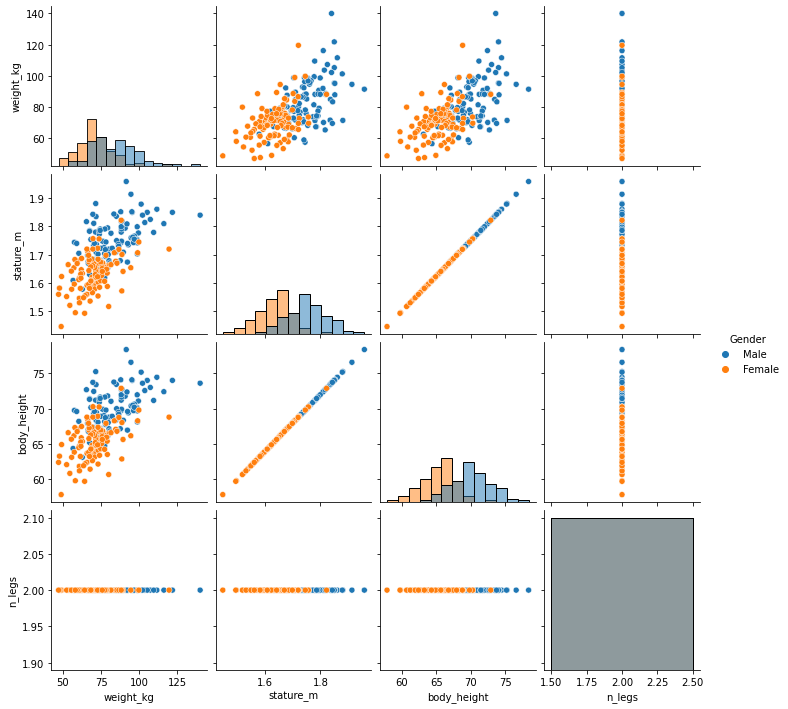

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

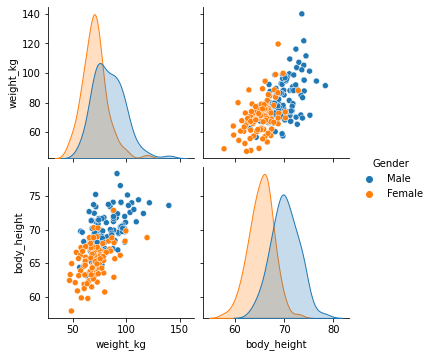

In [49]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop(['stature_m', 'n_legs'], axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show theplot
plt.show()

In [53]:
df1 = ansur_male[['Gender', 'footlength', 'headlength']][1800:1900]
df1['n_legs'] = [2] * 100

df2 = ansur_female[['Gender', 'footlength', 'headlength']][1800:1900]
df2['n_legs'] = [2] * 100

ansur_df_2 = pd.concat([df1, df2], axis=0, ignore_index=True)
ansur_df_2.head()

,Gender,footlength,headlength,n_legs
0,Male,292,206,2
1,Male,267,192,2
2,Male,284,198,2
3,Male,269,201,2
4,Male,253,203,2


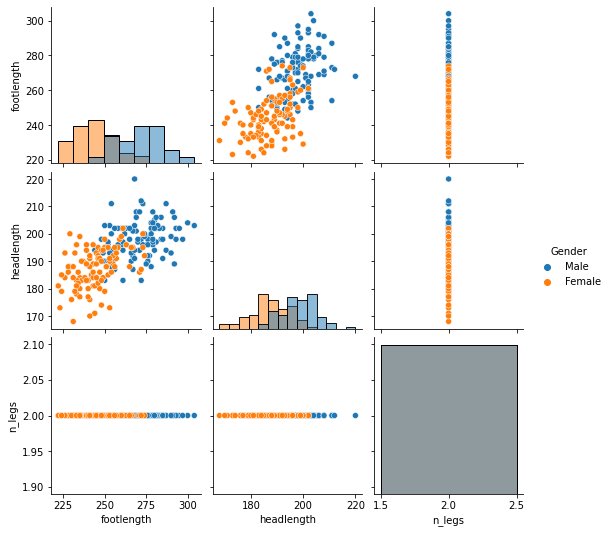

In [54]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

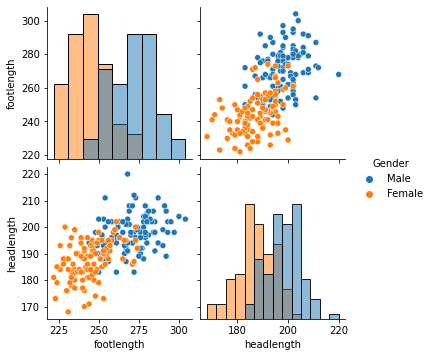

In [55]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

Answer: The selected features remain unchanged, and are therefore easier to interpret.

Answer: When you want to visually explore the patterns in a high dimensional dataset.

In [85]:
df = pd.concat([ansur_female, ansur_male], axis=0, ignore_index=True)
df = df.drop(['BMI', 'BMI_class', 'Height_class', 'stature_m', 'weight_kg'], axis=1)
df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,844,1488,406,295,850,217,345,942,152,756
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,901,1470,422,254,708,168,329,1032,155,815
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,...,882,1542,419,269,727,159,367,1035,162,799
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,...,866,1627,451,302,923,235,371,999,173,818
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,...,800,1698,452,405,1163,300,380,911,152,762


In [86]:
from sklearn.manifold import TSNE

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


In [91]:
idx = [38,2401,3819,81,464,1771,3190,2425,112,1415,921,282,377,343,3549,676,3718,2005,1375,1560,2815,2140,2872,362,3530,2644,4067,2786,3285,3454,1538,1335,1841,372,255,3928,23,3561,1072,1883,2335,835,303,3100,368,1808,711,714,210,461,1506,1923,412,612,1569,2518,1614,503,1436,981,3405,465,2354,2145,284,4043,3185,1489,1642,2572,774,2946,1501,109,3191,1965,3214,1979,1287,1435,1499,1529,87,802,434,2952,1103,693,2865,2608,768,1106,1507,3668,1782,1801,489,3339,3951,426,1895,332,2828,697,2562,816,1924,1065,1381,501,1658,991,1078,1278,3766,1024,963,472,1885,730,1800,3594,68,3978,1427,1058,1679,638,1017,1394,78,2471,4058,2207,571,2118,2417,1303,1763,126,702,3007,265,1198,762,1876,1027,1760,2199,207,1990,1937,1933,2412,3395,3379,1484,900,1643,1988,1620,575,1624,786,3894,2423,1959,83,3128,1683,1135,1521,2792,2038,1391,2221,1039,3272,3054,665,917,1507,763,2540,1935,1089,1325,3282,3431,2430,1706,1321,1940,1674,1000,1130,556,523,2186,939,2885,1294,2040,2239,433,225,171,3639,1357,246,660,3,3912,1912,1630,3563,946,794,1607,2273,304,2351,3526,690,1643,427,761,1938,659,777,1919,746,1805,1441,1729,2931,1233,1006,1212,2551,3032,1885,1902,2599,1783,1149,1696,3485,1598,1917,1749,1696,2068,1543,4040,1733,2024,3076,2693,118,365,1217,2484,2311,1870,427,1389,2097,1220,3865,1678,860,1781,1525,3284,3239,701,3816,3360,3062,733,230,360,3290,2220,2871,1644,272,521,3001,1894,3040,418,1183,3442,2346,863,505,688,716,220,1942,443,4073,3596,3123,1359,123,52,3630,3945,377,25,475,4050,484,1558,3531,965,2434,2197,1670,185,1231,20,806,1496,
       2051,569,2415,1059,1247,1787,2855,1517,3035,1057,1481,378,1932,3052,1092,1571,2650,548,99,151,1396,1548,15,488,1296,3370,168,372,1947,193,750,381,1585,2411,398,1333,876,2756,788,1051,3153,3678,358,1699,1657,3631,1968,981,2583,2308,555,684,93,1742,420,330,2544,41,76,536,1479,567,1279,438,2277,1889,964,182,3237,18,2080,3302,1390,528,1109,1219,3108,1683,142,1414,1586,772,423,1155,1218,396,537,2923,1157,1140,4071,1462,1377,373,2922,3952,3135,574,991,204,2284,3377,905,3231,2768,361,3210,1798,1954,2827,2942,3071,2357,1880,550,1774,3693,1681,4051,715,1781,544,2805,351,1394,2224,109,1260,3731,2661,3582,435,650,596,3449,790,223,137,2971,173,4002,835,1328,10,2550,2654,1878,1701,2053,866,1860,286,292,1745,698,2977,3386,551,3793,1620,103,1893,785,1174,1499,337,1077,1931,310,611,2150,867,1713,1667,80,1261,4016,3233,1697,1257,2876,1795,1951,3830,1086,1554,1487,487,2750,2279,1463,847,2816,1739,946,198,1518,409,2013,1038,744,3695,1460,1753,635,1028,1859,1633,983,1159,2059,1018,3629,471,492,2367,1515,1311,277,1947,3445,2160,2297,3387,752,802,428,2837,1396,1983,3557,714,535,295,1769,1350,35,1314,1311,1290,1604,1193,353,1780,2957,658,1550,1119,70,1347,504,3129,356,907,2784,1031,678,1057,3280,312,2334,1354,1435,901,510,1592,96,2735,1661,146,1319,1008,3070,1488,602,2487,794,961,3985,1952,652,5,3746,237,58,205,2161,3476,3542,1111,13,800,1098,2870,102,2403,1757,1037,3352,1746,2840,2472,1586,2456,2164,4079,1469,1661,1824,1585,1934,2087,17,3059,2287,1948,330,3567,485,727,3451,1539,1985,2746,3226,3118,2595,1044,3682,696,
       1272,1340,1603,2455,2657,1428,2243,1043,2505,1240,1692,2502,1491,384,3434,1352,3393,147,1777,3676,1029,1917,2391,2897,1299,1664,1632,349,1451,1840,2016,804,430,3213,937,332,3702,189,1904,2439,2682,2368,830,733,2913,1352,2929,843,2300,1439,832,1909,1812,2065,1346,354,746,2137,876,1139,179,453,2,2078,1729,2188,3177,2860,1916,1184,573,354,87,1884,862,1580,2485,1344,2373,3268,1245,905,2856,625,952,605,1368,2785,1278,1184,623,911,3096,482,3162,2564,2270,3247,3439,2726,1096,507,429,2427,621,538,2102,1280,1141,3367,3389,1959,2294,3471,824,1449,2928,3222,386,583,1862,3615,444,1651,3633,3908,3486,3620,1914,364,285,3728,259,111,242,1553,1462,1483,2581,189,3929,2882,2060,1782,1500,2715,54,3876,3430,951,1687,445,1145,3019,2848,611,3761,566,708,3362,1954,1293,526,213,1013,3253,2557,1877,1803,1852,2359,3106,3356,1870,1960,830,1166,1533,958,2846,1758,2000,119,9,3218,1277,3500,2709,2938,986,2459,2892,1569,1944,3479,2011,2939,1766,13,2055,160,1614,3269,3934,1283,791,3292,1910,1493,1691,3286,2829,62,3849,2706,1410,992,1884,750,177,256,2506,184,2974,2754,283,825,2790,2713,3459,3142,1849,2793,1068,1453,883,3641,2653,586,1939,2320,1460,1208,172,1972,2135,3942,873,413,3465,1867,1371,3234,3034,3242,424,1114,1742,2381,2361,1313,2196,1087,751,562,3850,1002,3782,116,1838,3959,532,3396,710,1207,3,207,80,1264,1903,1234,1672,616,68,850,2192,2316,2449,687,83,663,1168,1248,1165,1101,2094,579,1953,1382,2705,1405,3740,143,629,3172,1776,1047,2099,726,3216,3487,1361,1036,4032,780,1312,605,1120,1605,1728,2054,2458,1653,2398,1061,
       743,174,323,3311,56,1306,906,1575,2722,1416,337,3872,3048,959,3650,283,113,1925,1744,1432,1143,1816,1120,2036,1116,314,1699,1842,3301,1051,3021,1534,1079,1199,3217,1855,2029,2968,1898,329,930,3926,34,2413,2119,2762,1417,3136,508,3334,114,1485,2958,1673,2512,1575,3691,531,1020,210,1709,1009,997,1576,1980,1190,2209,2093,291,371,218,1407,673,1522,3345,2989,1650,904,3800,3547,3176,561,3161,1408,3295,997,3066,1905,2925,1156,1498,2376,1804,356,1712,3723,757,241,3772,3716,1508,2154,1310,1156,364,1478,1045,3992,2406,2519,3670,3204,872,888,100,3855,834,1646,2282,851,1956,2847,2012,1588,2462,1335,1235,1506,3415,3871,1908,3756,1622,116,79,1172,797,2158,3814,1076,2477,1543,1121,1961,294,1160,8,1124,1208,2743,1041,47,3376,1993,921,4074,3501,1645,3047,1382,2049,1331,3261,1324,1434,616,1275,610,3621,2566,1700,801,1173,912,1072,594,391,3077,2144,3555,2194,1516,1538,1719,209,3322,1196,4068,150,279,971,258,444,693,3565,1651,3422,1253,26,2567,1000,3757,1682,2570,1748,600,3105,5,277,690,607,3973,1764,3252,1112,278,2216,1263,3711,1182,1503,3198,1542,815,2687,134,1874,37,2195,624,1901,1168,2831,3957,2249,152,1385,717,380,117,3474,2173,850,1339,3313,279,559,1093,621,3511,518,2717,2883,3815,1629,1489,812,2056,818,1734,3833,1266,2233,3103,3384,2677,3843,3171,291,3276,2112,2930,3743,1981,1457,683,1177,3968,533,389,838,2891,483,681,2984,1,1381,1206,124,2976,522,2733,82,608,499,3883,299,3727,840,1194,3342,1099,1835,1400,1328,4038,1722,3093,1636,281,262,419,3677,3065,2281,450,3970,554,3635,4039,1330,3863,2326,1919,410,1030,
       1323,2868,202,1265,3605,1380,1360,305,67,1420,325,3461,206,311,949,1778,1469,1325,303,2261,2649,1281,3296,1792,40,1211,1728,208,256,987,1282,969,1074,3200,2409,3338,71,666,495,1647,126,2009,1154,1305,171,3323,47,1621,363,4029,2765,1594,1232,1617,1322,2673,1127,546,219,2292,736,1897,3029,1837,1726,592,1702,2918,369,3546,419,1197,1315,1337,3640,1546,3709,3410,2193,869,1566,483,442,680,1602,3971,2509,39,789,499,3343,689,501,2106,1478,79,105,1818,1541,1170,1105,16,998,263,1250,2737,2684,2110,1583,585,3999,1823,2395,432,2622,1895,140,2489,1684,3749,2170,400,3911,4035,2602,620,2479,903,807,1477,1198,46,3064,2047,2914,2781,547,262,306,1115,1303,1735,1504,2658,2202,98,90,4004,2457,1212,865,1615,1353,271,4066,776,2670,2289,1440,1450,2100,567,2324,982,1689,845,1082,2103,1677,1786,347,3890,3183,1505,694,112,2995,1277,3905,812,2162,2685,2362,1854,3791,865,3769,3131,1199,2527,3798,885,3916,803,1007,897,3777,884,539,3132,1685,1567,3355,3967,1551,1391,2182,3741,3953,1914,609,3174,942,1241,1301,1504,2799,544,2212,814,29,950,1810,677,1487,2142,4018,1553,1016,1887,3289,1814,824,1222,985,1196,1941,1731,124,947,770,227,115,3665,1513,563,2508,1045,3413,1639,620,1236,1746,1795,1291,270,1020,3862,3701,820,458,3739,129,1596,1481,1695,292,3495,779,289,2312,904,1975,1924,1334,1246,740,2576,55,805,3023,1452,1048,319,3149,1206,1909,1762,3792,3496,2591,3725,740,3026,3720,823,1149,95,762,3822,3083,1287,352,3588,1249,3579,2748,2499,1456,1401,1886,2766,1317,454,1242,1475,889,2310,1384,1564,534,1848,632,949,3368,2838,1365,2141,
       2907,72,3044,671,3341,3994,1611,1159,1709,2433,3895,1409,3699,1613,163,1094,1475,2683,1472,564,324,2445,1309,791,1063,1398,455,3998,947,1085,1793,1498,1179,392,629,1595,1667,3248,3980,1764,1915,3432,1964,2447,1723,3580,3169,3201,269,792,1827,3433,26,57,854,1275,808,2165,1933,1510,728,937,2694,3278,1332,1412,1181,238,1717,1013,945,144,1088,3805,2949,1245,15,1514,2879,411,3597,892,2325,1817,822,2222,2973,612,33,1043,325,503,104,702,3315,3215,138,4023,2926,3787,14,1834,2714,3753,3884,889,478,588,3481,1966,1116,874,980,934,1743,1765,732,1436,930,1602,1480,61,3228,229,2218,1850,2183,1761,654,368,3519,1062,2818,1694,149,692,1535,1445,853,892,1626,3499,96,633,2514,3181,1399,1133,1333,514,3050,276,603,128,1763,3613,3685,932,110,3859,810,301,378,944,347,1383,1056,607,286,2607,1191,297,816,778,2902,1932,895,1317,1014,1319,1692,1999,1444,3365,1587,3675,813,107,832,254,661,302,243,308,2248,1433,2095,3488,3974,3116,2603,275,4080,1251,2524,1809,1944,2563,170,2474,56,48,167,2881,2803,3236,704,1290,1963,327,1663,1254,2290,630,1286,1825,3224,1876,3543,1486,1681,4045,1671,1865,1593,3573,3051,852,4052,3623,27,137,782,2444,1097,1117,1946,85,3838,369,1321,3964,3088,1237,224,2963,1221,1837,2001,1640,52,236,1756,2849,3562,1589,1626,473,1318,3924,2621,3030,783,493,2074,2466,857,527,3003,2797,1461,2252,2276,1480,251,2757,1915,2371,1738,1935,4008,1316,3372,2528,3143,2835,250,1413,965,1100,3178,412,399,1829,1779,974,1898,1266,2611,1142,828,2229,1794,614,1388,313,1930,980,203,2155,3170,1525,1807,1047,1171,345,1557,3262,
       2426,1857,362,1301,633,770,334,1579,2779,4009,1308,459,1163,1386,1205,585,2306,2791,1730,4017,2741,2364,1079,2874,2878,2117,753,1642,367,1819,983,2723,2901,3840,3589,512]

In [92]:
new_df = df.iloc[idx]
df_numeric = new_df.drop(['Branch', 'Gender', 'Component'], axis=1)
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numeric)
new_df['x'] = tsne_features[:, 0]
new_df['y'] = tsne_features[:, 1]

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13012\525886787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['x'] = tsne_features[:, 0]
C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13012\525886787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['y'] = tsne_features[:, 1]


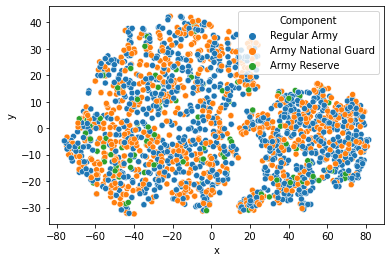

In [93]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=new_df)

# Show the plot
plt.show()

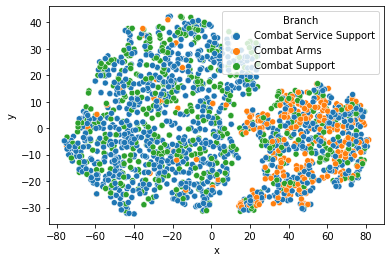

In [94]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=new_df)

# Show the plot
plt.show()

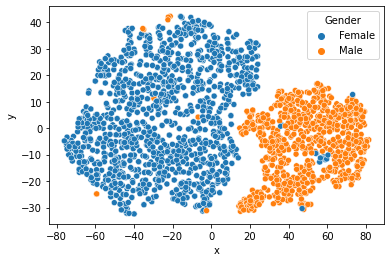

In [95]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=new_df)

# Show the plot
plt.show()

## 2. Feature Selection I - Selecting for Feature Information

In [98]:
ansur_df = pd.concat([ansur_male[:100], ansur_female[:100]], axis=0, ignore_index=True)
ansur_df = ansur_df.drop(['BMI', 'BMI_class', 'Branch', 'Component', 'Height_class', 'stature_m'], axis=1)
ansur_df.head()

,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg
0,Male,266,1467,337,222,1347,253,202,401,369,...,1700,501,329,933,240,440,1054,175,853,81.5
1,Male,233,1395,326,220,1293,245,193,394,338,...,1627,432,316,870,225,371,1054,167,815,72.6
2,Male,287,1430,341,230,1327,256,196,427,408,...,1678,472,329,964,255,411,1041,180,831,92.9
3,Male,234,1347,310,230,1239,262,199,401,359,...,1625,461,315,857,205,399,968,176,793,79.4
4,Male,250,1585,372,247,1478,267,224,435,356,...,1679,467,303,868,214,379,1245,188,954,94.6


In [99]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

60 rows in test set vs. 140 in training set, 92 Features.


In [100]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

90.0% accuracy on test set vs. 86.4% on training set


In [101]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

91.7% accuracy on test set vs. 92.1% on training set


In [106]:
from random import random

a = 99967.39384904224
b = 100039.58602704038

head_df = pd.concat([ansur_male, ansur_female], axis=0, ignore_index=True)
head_df = head_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]
head_df['n_hairs'] = [random() * (b - a) + a for _ in range(head_df.shape[0])]
head_df['measurement_error'] = [0.1] * head_df.shape[0]
head_df.head()

,headbreadth,headcircumference,headlength,tragiontopofhead,n_hairs,measurement_error
0,150,583,206,140,99994.694545,0.1
1,146,568,201,120,99976.352147,0.1
2,148,573,202,125,99993.326437,0.1
3,158,576,199,127,99994.910705,0.1
4,153,566,197,122,99990.407395,0.1


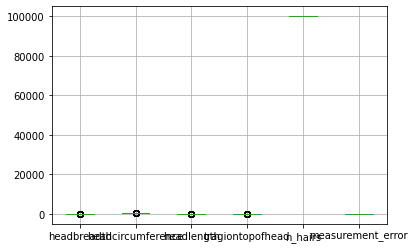

In [107]:
# Create the boxplot
head_df.boxplot()

plt.show()

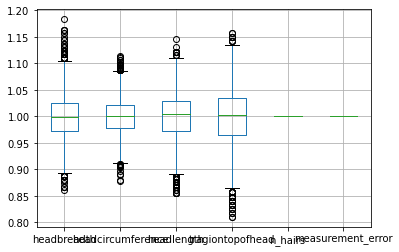

In [108]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [109]:
# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              4.301403e-08
measurement_error    0.000000e+00
dtype: float64


Answer: 1.0e-03

In [110]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

Dimensionality reduced from 6 to 4.


Answer: Between 0.9 and 1.0

In [114]:
school_df = pd.read_csv('Public_Schools2.csv')
school_df.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [115]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


Answer: The correlation coefficient of A to B is equal to that of B to A.

In [118]:
ansur_df = pd.concat([ansur_male, ansur_female], axis=0, ignore_index=True)
ansur_df = ansur_df[['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']]
ansur_df.head()

,elbowrestheight,wristcircumference,anklecircumference,buttockheight,crotchheight
0,247,175,222,882,877
1,232,167,220,870,851
2,237,180,230,901,854
3,272,176,230,821,769
4,188,188,247,1080,1014


In [119]:
ansur_df.corr()

,elbowrestheight,wristcircumference,anklecircumference,buttockheight,crotchheight
elbowrestheight,1.000000,0.294753,0.301963,-0.007013,-0.026090
wristcircumference,0.294753,1.000000,0.702178,0.576679,0.606582
anklecircumference,0.301963,0.702178,1.000000,0.367548,0.386502
buttockheight,-0.007013,0.576679,0.367548,1.000000,0.929411
crotchheight,-0.026090,0.606582,0.386502,0.929411,1.000000


Answer: 0.702

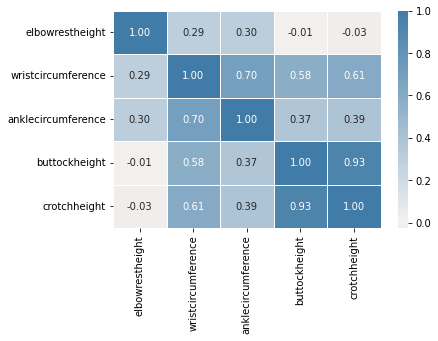

In [121]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

# Create the correlation matrix
corr = ansur_df.corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [123]:
import numpy as np

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


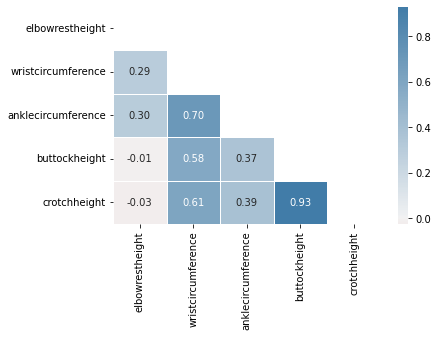

In [124]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Answer: Buttock height and Crotch height.

In [126]:
ansur_df = pd.concat([ansur_male, ansur_female], axis=0, ignore_index=True)
ansur_df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [127]:
# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13012\3489773749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = ansur_df.corr().abs()


The reduced_df DataFrame has 80 columns.


In [129]:
weird_df = pd.DataFrame({'pool_drownings': [421, 465, 494, 538, 430, 530, 511, 600, 582, 605, 603],
                         'nuclear_energy': [728.3, 753.9, 768.8, 780.1, 763.7, 788.5, 782.0, 787.2, 806.4, 806.2, 798.9]})

In [131]:
# Print the first five lines of weird_df
weird_df.head()

,pool_drownings,nuclear_energy
0,421,728.3
1,465,753.9
2,494,768.8
3,538,780.1
4,430,763.7


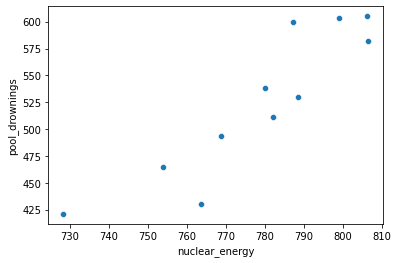

In [132]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

In [133]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


Answer: Not much, correlation does not imply causation.

## 3. Feature Selection II - Selecting for Model Accuracy

In [156]:
diabetes_df = pd.read_csv('PimaIndians.csv')
diabetes_df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
lr = LogisticRegression()

In [158]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

84.8% accuracy on test set.
{'pregnant': 0.04, 'glucose': 0.96, 'diastolic': 0.02, 'triceps': 0.17, 'insulin': 0.1, 'bmi': 0.49, 'family': 0.44, 'age': 0.46}


In [159]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]

X.drop('diastolic', axis=1, inplace=True)

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13012\1732961875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('diastolic', axis=1, inplace=True)


In [160]:
# Remove the 2 features with the lowest model coefficients
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

X.drop(['pregnant', 'insulin'], axis=1, inplace=True)

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13012\2996512084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['pregnant', 'insulin'], axis=1, inplace=True)


In [161]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

X = X[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.")  
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


In [163]:
X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [164]:
from sklearn.feature_selection import RFE

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print(f"{acc:.1%} accuracy on test set.") 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 2, 'diastolic': 5, 'triceps': 4, 'insulin': 6, 'bmi': 1, 'family': 1, 'age': 3}
Index(['pregnant', 'bmi', 'family'], dtype='object')
65.8% accuracy on test set.


In [172]:
X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']

from sklearn.ensemble import RandomForestClassifier

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print(f"{acc:.1%} accuracy on test set.") 

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


In [174]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.13

# Prints out the mask
print(mask)

[False  True False False  True False False False]


In [175]:
# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'insulin'], dtype='object')


In [177]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask using the support_ attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'bmi'], dtype='object')


In [178]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'age'], dtype='object')


In [180]:
ansur_df = pd.concat([ansur_male, ansur_female], axis=0, ignore_index=True)

X = ansur_df.drop(['BMI','BMI_class','Branch','Component','Gender','Height_class','stature_m','weight_kg'], axis=1)
y = ansur_df['BMI']

In [182]:
from sklearn.linear_model import Lasso

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso()

In [183]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print(f"The model has ignored {n_ignored} out of {len(la.coef_)} features.")

The model can predict 82.9% of the variance in the test set.
The model has ignored 81 out of 91 features.


In [184]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")
print(f"{n_ignored_features} out of {len(la.coef_)} features were ignored.")

The model can predict 97.8% of the variance in the test set.
68 out of 91 features were ignored.


In [185]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print(f'Optimal alpha = {lcv.alpha_:.3f}')

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print(f'The model explains {r_squared:.1%} of the test set variance')

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print(f'{sum(lcv_mask)} features out of {len(lcv_mask)} selected')

Optimal alpha = 0.406
The model explains 98.6% of the test set variance
41 features out of 91 selected


C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.022e+00, tolerance: 6.736e+00
  model = cd_fast.enet_coordinate_descent(


In [189]:
ansur_df = pd.concat([ansur_male, ansur_female], axis=0, ignore_index=True)[:1000]

X = ansur_df[['acromialheight', 'axillaheight', 'bideltoidbreadth', 'buttockcircumference', 'buttockkneelength', 
              'buttockpopliteallength', 'cervicaleheight', 'chestcircumference', 'chestheight', 'earprotrusion', 
              'footbreadthhorizontal', 'forearmcircumferenceflexed', 'handlength', 'headbreadth', 'heelbreadth', 
              'hipbreadth', 'iliocristaleheight', 'interscyeii', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 
              'neckcircumferencebase', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'sleeveoutseam', 
              'thighcircumference', 'thighclearance', 'verticaltrunkcircumferenceusa', 'waistcircumference', 'waistdepth', 
              'wristheight', 'BMI']]
y = ansur_df[['bicepscircumferenceflexed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [198]:
lcv = LassoCV()
lcv.fit(X_train, y_train)
r_squared = lcv.score(X_test, y_test)
lcv_mask = lcv.coef_ != 0

In [191]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.


RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=3,
    verbose=1)

In [193]:
# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

The model can explain 83.3% of the variance in the test set


In [194]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to rf_mask
rf_mask = rfe_rf.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 81.2% of the variance in the test set


In [200]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

[1 0 3 3 1 1 1 3 1 0 0 3 0 0 0 0 1 2 1 2 0 1 3 1 0 3 2 2 2 2 1 2]


In [201]:
# Create a mask for features selected by all 3 models
meta_mask = votes == 3
print(meta_mask)

[False False  True  True False False False  True False False False  True
 False False False False False False False False False False  True False
 False  True False False False False False False]


In [202]:
# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)

Index(['bideltoidbreadth', 'buttockcircumference', 'chestcircumference',
       'forearmcircumferenceflexed', 'shouldercircumference',
       'thighcircumference'],
      dtype='object')


In [205]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set using {len(lm.coef_)} features.')

The model can explain 86.6% of the variance in the test set using 1 features.


## 4. Feature Extraction

In [208]:
sales_df = pd.read_csv('grocery_sales.csv')
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [209]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [211]:
height_df = pd.DataFrame({'weight_kg': [81.5,72.6,92.9,79.4,94.6,80.2,116.2,95.4,99.5,70.2,88.2,70.1,103.7,111.6,89.6,92.4,77.9,96.9,76.0,90.8,71.4,74.6,79.2,91.5,96.5,67.5,107.3,79.3,78.2,88.2,71.5,94.7,66.5,87.9,67.5,88.4,69.5,121.8,71.9,88.1,57.5,87.6,85.0,86.5,95.8,66.7,70.6,84.7,101.3,85.6,109.5,83.4,72.7,98.6,77.3,140.0,67.4,88.4,98.8,95.2,56.6,71.7,71.7,80.2,98.8,66.2,80.7,105.3,68.3,74.9,73.8,60.4,77.4,76.8,102.2,96.3,92.3,98.8,88.7,98.7,85.2,74.8,92.0,74.4,82.3,62.7,77.8,88.2,59.0,73.0,86.4,86.6,73.7,65.4,69.6,77.5,72.7,79.7,74.4,96.8], 
                          'height_1': [1.78,1.7,1.74,1.66,1.91,1.72,1.81,1.85,1.78,1.81,1.78,1.73,1.81,1.86,1.71,1.74,1.69,1.77,1.75,1.79,1.78,1.68,1.65,1.96,1.76,1.63,1.82,1.8,1.74,1.82,1.88,1.76,1.68,1.85,1.78,1.79,1.68,1.85,1.74,1.74,1.74,1.68,1.84,1.73,1.76,1.67,1.74,1.71,1.88,1.67,1.78,1.84,1.64,1.75,1.7,1.84,1.78,1.75,1.7,1.85,1.61,1.71,1.84,1.68,1.74,1.7,1.67,1.85,1.75,1.62,1.77,1.7,1.62,1.73,1.84,1.74,1.67,1.75,1.82,1.8,1.75,1.72,1.81,1.79,1.72,1.58,1.72,1.8,1.74,1.7,1.74,1.73,1.78,1.82,1.84,1.79,1.66,1.7,1.79,1.76], 
                          'height_2': [1.8,1.7,1.75,1.68,1.93,1.71,1.82,1.85,1.78,1.81,1.78,1.74,1.82,1.86,1.71,1.74,1.7,1.77,1.75,1.78,1.75,1.69,1.66,1.95,1.78,1.62,1.82,1.8,1.76,1.83,1.88,1.76,1.67,1.83,1.78,1.79,1.69,1.86,1.74,1.74,1.73,1.67,1.82,1.75,1.75,1.67,1.73,1.72,1.86,1.67,1.77,1.84,1.63,1.74,1.7,1.84,1.78,1.75,1.69,1.85,1.6,1.71,1.83,1.66,1.74,1.7,1.65,1.85,1.74,1.62,1.78,1.7,1.63,1.72,1.84,1.73,1.66,1.74,1.82,1.8,1.74,1.73,1.81,1.77,1.73,1.6,1.73,1.8,1.73,1.71,1.74,1.74,1.78,1.83,1.84,1.8,1.66,1.72,1.79,1.76], 
                          'height_3': [1.8,1.69,1.73,1.67,1.9,1.74,1.81,1.84,1.8,1.82,1.8,1.74,1.8,1.88,1.71,1.75,1.7,1.77,1.76,1.8,1.78,1.67,1.65,1.97,1.75,1.63,1.82,1.82,1.75,1.82,1.87,1.77,1.67,1.85,1.77,1.8,1.69,1.85,1.74,1.73,1.73,1.68,1.84,1.74,1.78,1.68,1.73,1.72,1.87,1.67,1.78,1.86,1.63,1.74,1.7,1.83,1.79,1.74,1.69,1.85,1.61,1.73,1.85,1.68,1.73,1.71,1.66,1.83,1.76,1.62,1.78,1.7,1.63,1.72,1.83,1.75,1.66,1.74,1.82,1.8,1.75,1.71,1.8,1.77,1.73,1.56,1.71,1.8,1.73,1.72,1.73,1.73,1.78,1.81,1.85,1.79,1.67,1.71,1.81,1.77]})

In [212]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


Answer: People with a negative component for the yellow vector have long forearms relative to their upper arms.

In [215]:
ansur_df = ansur_df[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']][:250]

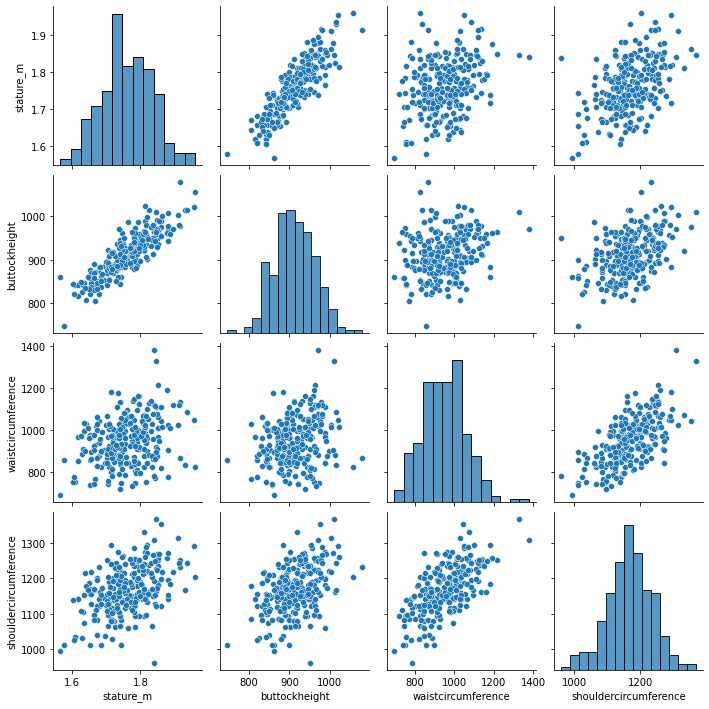

In [216]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

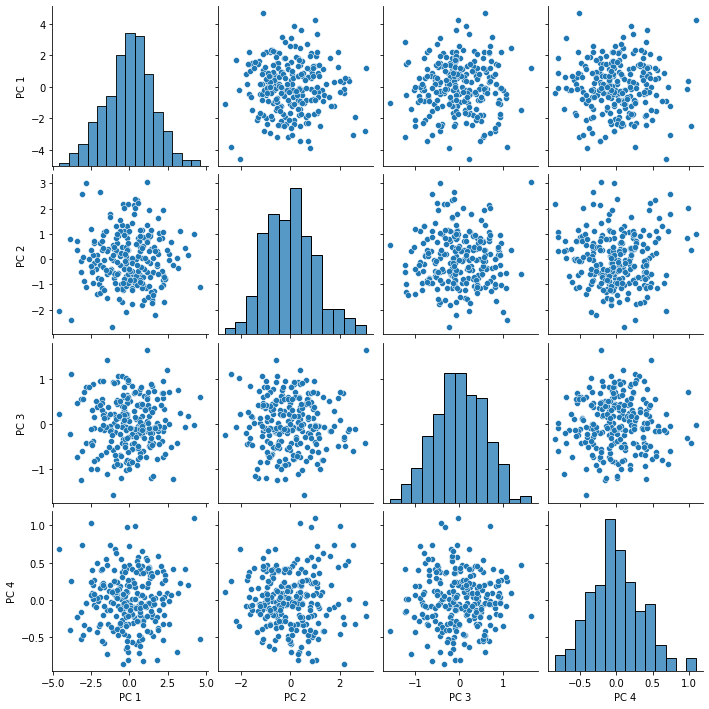

In [218]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA()

In [220]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.62393205 0.26369476 0.08019    0.03218318]


Answer: About 3.77%

In [221]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.62393205 0.88762682 0.96781682 1.        ]


Answer: 4 principal components

In [224]:
pokemon = pd.read_csv('pokemon.csv')
poke_df = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
poke_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [226]:
from sklearn.pipeline import Pipeline

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


Answer: All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats).

Answer: Defense has a strong positive effect on the second component and speed a strong negative one. This component quantifies an agility versus armor and protection trade-off.

In [233]:
poke_cat_df = pokemon[['Type 1', 'Legendary']]
poke_cat_df.rename(columns={"Type 1": 'Type'}, inplace=True)

poke_cat_df.head()

,Type,Legendary
0,Grass,False
1,Grass,False
2,Grass,False
3,Grass,False
4,Fire,False


In [234]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

poke_cat_df.head()

,Type,Legendary,PC 1,PC 2
0,Grass,False,-1.556375,-0.021482
1,Grass,False,-0.362867,-0.050269
2,Grass,False,1.280152,-0.062720
3,Grass,False,2.620916,0.704263
4,Fire,False,-1.758284,-0.706179


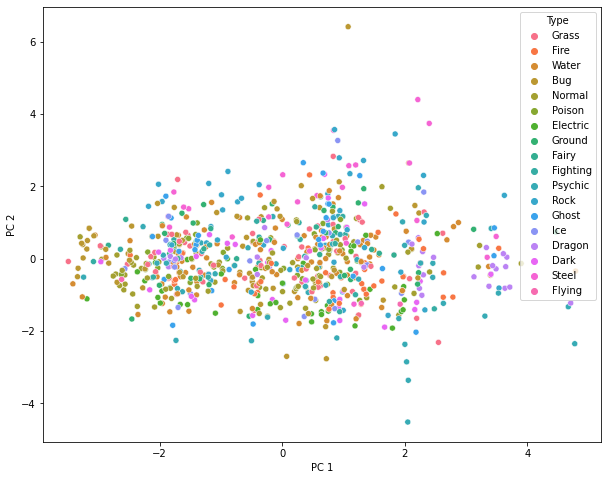

In [238]:
plt.figure(figsize=(10,8))

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')

plt.show()

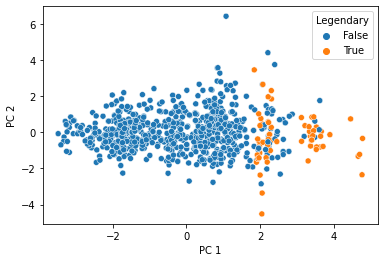

In [239]:
# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

In [240]:
X = poke_df
y = poke_cat_df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [242]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

[0.43393705 0.18540751]


In [243]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

94.6% test set accuracy


In [244]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.43393705 0.18540751 0.13417713]
93.3% test set accuracy


In [247]:
ansur_df = pd.concat([ansur_male, ansur_female], axis=0, ignore_index=True)
ansur_df = ansur_df.drop(['BMI_class', 'Branch', 'Component', 'Gender', 'Height_class'], axis=1)
ansur_df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,...,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,...,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,234,1347,310,230,1239,262,199,401,359,262,...,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,250,1585,372,247,1478,267,224,435,356,263,...,303,868,214,379,1245,188,954,94.6,1.914,25.823034


In [248]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

6 components selected


In [249]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.90))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

17 components selected


Answer: 12

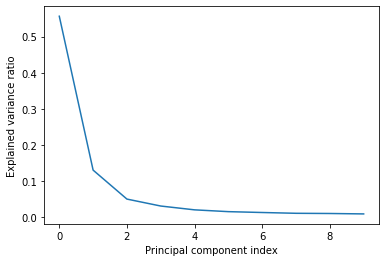

In [250]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

Answer: 3

In [ ]:
# Plot the MNIST sample data
plot_digits(X_test)

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print(f"X_test has {X_test.shape[1]} features")
print(f"pc has {pc.shape[1]} features")

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print(f"X_rebuilt has {X_rebuilt.shape[1]} features")

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)